# handling missing values by diffrent -2 strategies in diffrent -2 columns or by Pipeline Methods & columns  Transformer

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [2]:
train=pd.read_csv('/home/utkarss/MACHINE LEARNING HANDS ON PYTHON/DataSheets/NFL_Train.csv',low_memory=False)
test=pd.read_csv('/home/utkarss/MACHINE LEARNING HANDS ON PYTHON/DataSheets/NFL_Test.csv',low_memory=False)

In [3]:
train.isnull().sum()

Date             0
GameID           0
Drive            0
qtr              0
down         54218
             ...  
Win_Prob     21993
WPA           4817
airWPA      220738
yacWPA      220956
Season           0
Length: 102, dtype: int64

In [4]:
# divide it into two parts 1 numerical variable , 2 categorical variable
num_vars=train.select_dtypes(include=['int64','float64']).columns
cat_vars=train.select_dtypes(include=['object']).columns

In [5]:
isnull_sum=train[num_vars].isnull().sum()

In [6]:
isnull_cat_sum=train[cat_vars].isnull().sum()

In [8]:
num_var_miss=[var for var in num_vars if isnull_sum[var]>0]
cat_var_miss=[var for var in  cat_vars if isnull_cat_sum[var]>0]

In [29]:
num_var_not_miss=[var for var in num_vars if isnull_sum[var]==0]
cat_var_not_miss=[var for var in  cat_vars if isnull_cat_sum[var]==0]

In [30]:
data_not_miss_num=train[num_var_not_miss]
data_not_miss_cat=train[cat_var_not_miss]

In [31]:
already_cleaned_data=pd.concat((data_not_miss_num,data_not_miss_cat),axis=1)

In [34]:
already_cleaned_data_columns=already_cleaned_data.columns
len(already_cleaned_data_columns)

37

In [13]:
num_var_miss

['down',
 'TimeSecs',
 'PlayTimeDiff',
 'yrdln',
 'yrdline100',
 'GoalToGo',
 'FirstDown',
 'FieldGoalDistance',
 'PosTeamScore',
 'DefTeamScore',
 'ScoreDiff',
 'AbsScoreDiff',
 'No_Score_Prob',
 'Opp_Field_Goal_Prob',
 'Opp_Safety_Prob',
 'Opp_Touchdown_Prob',
 'Field_Goal_Prob',
 'Safety_Prob',
 'Touchdown_Prob',
 'ExpPts',
 'EPA',
 'airEPA',
 'yacEPA',
 'Home_WP_pre',
 'Away_WP_pre',
 'Home_WP_post',
 'Away_WP_post',
 'Win_Prob',
 'WPA',
 'airWPA',
 'yacWPA']

In [14]:
cat_var_miss

['time',
 'SideofField',
 'posteam',
 'DefensiveTeam',
 'desc',
 'ExPointResult',
 'TwoPointConv',
 'DefTwoPoint',
 'PuntResult',
 'Passer',
 'Passer_ID',
 'PassOutcome',
 'PassLength',
 'PassLocation',
 'Interceptor',
 'Rusher',
 'Rusher_ID',
 'RunLocation',
 'RunGap',
 'Receiver',
 'Receiver_ID',
 'ReturnResult',
 'Returner',
 'BlockingPlayer',
 'Tackler1',
 'Tackler2',
 'FieldGoalResult',
 'RecFumbTeam',
 'RecFumbPlayer',
 'ChalReplayResult',
 'PenalizedTeam',
 'PenaltyType',
 'PenalizedPlayer',
 'Timeout_Team']

In [15]:
data_miss_num=train[num_var_miss]
data_miss_cat=train[cat_var_miss]
missing_data=pd.concat((data_miss_num,data_miss_cat),axis=1)

In [35]:
missing_data.columns

65

In [17]:
# list the columns by method wich you choose for fill the values
num_var_mean=[
                 'airEPA',
                 'yacEPA',
                 'Home_WP_pre',
                 'Away_WP_pre',
                 'Home_WP_post',
                 'Away_WP_post',
                 'Win_Prob',
                 'WPA',
                 'airWPA',
                 'yacWPA'
                ]
num_var_median=['AbsScoreDiff',
                 'No_Score_Prob',
                 'Opp_Field_Goal_Prob',
                 'Opp_Safety_Prob',
                 'Opp_Touchdown_Prob',
                 'Field_Goal_Prob',
                 'Safety_Prob',
                 'Touchdown_Prob',
                 'ExpPts',
                 'EPA'
                ]
num_var_mode=['down',
                 'TimeSecs',
                 'PlayTimeDiff',
                 'yrdln',
                 'yrdline100',
                 'GoalToGo',
                 'FirstDown',
                 'FieldGoalDistance',
                 'PosTeamScore',
                 'DefTeamScore',
                 'ScoreDiff']

cat_var_mean=['ReturnResult',
                 'Returner',
                 'BlockingPlayer',
                 'Tackler1',
                 'Tackler2',
                 'FieldGoalResult',
                 'RecFumbTeam',
                 'RecFumbPlayer',
                 'ChalReplayResult',
                 'PenalizedTeam',
                 'PenaltyType',
                 'PenalizedPlayer',
                 'Timeout_Team']
cat_var_median=['PassOutcome',
                 'PassLength',
                 'PassLocation',
                 'Interceptor',
                 'Rusher',
                 'Rusher_ID',
                 'RunLocation',
                 'RunGap',
                 'Receiver',
                 'Receiver_ID']
cat_var_mode=['time',
                 'SideofField',
                 'posteam',
                 'DefensiveTeam',
                 'desc',
                 'ExPointResult',
                 'TwoPointConv',
                 'DefTwoPoint',
                 'PuntResult',
                 'Passer',
                 'Passer_ID',]


# PIPELINE

In [18]:
num_var_mean_imputer=Pipeline(steps=[('imputer',SimpleImputer(strategy='mean'))])
num_var_median_imputer=Pipeline(steps=[('imputer',SimpleImputer(strategy='median'))])
num_var_mode_imputer=Pipeline(steps=[('imputer',SimpleImputer(strategy='most_frequent'))])
cat_var_mean_imputer=Pipeline(steps=[('imputer',SimpleImputer(strategy='most_frequent'))])
cat_var_median_imputer = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent'))])
cat_var_mode_imputer=Pipeline(steps=[('imputer',SimpleImputer(strategy='most_frequent'))])

# Column Transformer

In [19]:
Preprocessor = ColumnTransformer(
    transformers=[
        ('num_mean', num_var_mean_imputer, num_var_mean),
        ('num_median', num_var_median_imputer, num_var_median),
        ('num_mode', num_var_mode_imputer, num_var_mode),
        
        ('cat_mean', cat_var_mean_imputer, cat_var_mean),
        ('cat_median', cat_var_median_imputer, cat_var_median),
        ('cat_mode', cat_var_mode_imputer, cat_var_mode),
    ],
    remainder='passthrough'
)

In [36]:
Preprocessor.fit(missing_data)

ColumnTransformer(remainder='passthrough',
                  transformers=[('num_mean',
                                 Pipeline(steps=[('imputer', SimpleImputer())]),
                                 ['airEPA', 'yacEPA', 'Home_WP_pre',
                                  'Away_WP_pre', 'Home_WP_post', 'Away_WP_post',
                                  'Win_Prob', 'WPA', 'airWPA', 'yacWPA']),
                                ('num_median',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median'))]),
                                 ['AbsScoreDiff', 'No_Score_Prob',
                                  'Opp_Field_Go...
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 ['PassOutcome', 'PassLength', 'PassLocation',
                                  'Interceptor', 'Rusher', 'Rusher_ID',
                                  'RunLocation', 'RunGap', 'Receiver',
                                  'Receiver_ID']),
                                ('cat_mode',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 ['time', 'SideofField', 'posteam',
                                  'DefensiveTeam', 'desc', 'ExPointResult',
                                  'TwoPointConv', 'DefTwoPoint', 'PuntResult',
                                  'Passer', 'Passer_ID'])])

In [37]:
Preprocessor.transformers_

[('num_mean',
  Pipeline(steps=[('imputer', SimpleImputer())]),
  ['airEPA',
   'yacEPA',
   'Home_WP_pre',
   'Away_WP_pre',
   'Home_WP_post',
   'Away_WP_post',
   'Win_Prob',
   'WPA',
   'airWPA',
   'yacWPA']),
 ('num_median',
  Pipeline(steps=[('imputer', SimpleImputer(strategy='median'))]),
  ['AbsScoreDiff',
   'No_Score_Prob',
   'Opp_Field_Goal_Prob',
   'Opp_Safety_Prob',
   'Opp_Touchdown_Prob',
   'Field_Goal_Prob',
   'Safety_Prob',
   'Touchdown_Prob',
   'ExpPts',
   'EPA']),
 ('num_mode',
  Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent'))]),
  ['down',
   'TimeSecs',
   'PlayTimeDiff',
   'yrdln',
   'yrdline100',
   'GoalToGo',
   'FirstDown',
   'FieldGoalDistance',
   'PosTeamScore',
   'DefTeamScore',
   'ScoreDiff']),
 ('cat_mean',
  Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent'))]),
  ['ReturnResult',
   'Returner',
   'BlockingPlayer',
   'Tackler1',
   'Tackler2',
   'FieldGoalResult',
   'RecFumbTeam',
   'RecFumbPlaye

In [38]:
Piped_data=Preprocessor.transform(missing_data)
Test_data=Preprocessor.transform(test)

In [53]:
col_list=num_var_mean+num_var_median+num_var_mode+cat_var_mean+cat_var_median+cat_var_mode

In [59]:
#now combine data columns into one dataframe
last_data=pd.DataFrame(Piped_data,columns=col_list)

In [60]:
last_data

,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,...,SideofField,posteam,DefensiveTeam,desc,ExPointResult,TwoPointConv,DefTwoPoint,PuntResult,Passer,Passer_ID
0,0.526933,-0.386522,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,0.015209,-0.010492,...,TEN,PIT,TEN,R.Bironas kicks 67 yards from TEN 30 to PIT 3....,Made,Failure,Failure,Clean,D.Brees,00-0020531
1,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,...,PIT,PIT,TEN,(14:53) B.Roethlisberger pass short left to H....,Made,Failure,Failure,Clean,B.Roethlisberger,00-0022924
2,0.526933,-0.386522,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,0.015209,-0.010492,...,PIT,PIT,TEN,(14:16) W.Parker right end to PIT 44 for -3 ya...,Made,Failure,Failure,Clean,D.Brees,00-0020531
3,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,...,PIT,PIT,TEN,(13:35) (Shotgun) B.Roethlisberger pass incomp...,Made,Failure,Failure,Clean,B.Roethlisberger,00-0022924
4,0.526933,-0.386522,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,0.015209,-0.010492,...,PIT,PIT,TEN,(13:27) (Punt formation) D.Sepulveda punts 54 ...,Made,Failure,Failure,Clean,D.Brees,00-0020531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362442,4.620003,0.0,0.051901,0.948099,0.093435,0.906565,0.051901,0.041534,0.041534,0.0,...,GB,DET,GB,(:22) (Shotgun) M.Stafford pass deep middle to...,Made,Failure,Failure,Clean,M.Stafford,00-0026498
362443,0.526933,-0.386522,0.093435,0.906565,0.034069,0.965931,0.093435,-0.059366,0.015209,-0.010492,...,GB,DET,GB,"M.Prater extra point is GOOD, Center-D.Muhlbac...",Made,Failure,Failure,Clean,D.Brees,00-0020531
362444,0.526933,-0.386522,0.034069,0.965931,0.035708,0.964292,0.965931,-0.001639,0.015209,-0.010492,...,DET,GB,DET,S.Martin kicks onside 11 yards from DET 35 to ...,Made,Failure,Failure,Clean,D.Brees,00-0020531
362445,0.526933,-0.386522,0.035708,0.964292,0.0,1.0,0.964292,0.035708,0.015209,-0.010492,...,DET,GB,DET,(:12) A.Rodgers kneels to DET 47 for -1 yards.,Made,Failure,Failure,Clean,D.Brees,00-0020531


In [67]:
# Now Concatenate the datasets
final_data=pd.concat((already_cleaned_data,last_data),axis=1)

In [68]:
final_data

,GameID,Drive,qtr,TimeUnder,ydstogo,ydsnet,PlayAttempted,Yards.Gained,sp,Touchdown,...,SideofField,posteam,DefensiveTeam,desc,ExPointResult,TwoPointConv,DefTwoPoint,PuntResult,Passer,Passer_ID
0,2009091000,1,1,15,0,0,1,39,0,0,...,TEN,PIT,TEN,R.Bironas kicks 67 yards from TEN 30 to PIT 3....,Made,Failure,Failure,Clean,D.Brees,00-0020531
1,2009091000,1,1,15,10,5,1,5,0,0,...,PIT,PIT,TEN,(14:53) B.Roethlisberger pass short left to H....,Made,Failure,Failure,Clean,B.Roethlisberger,00-0022924
2,2009091000,1,1,15,5,2,1,-3,0,0,...,PIT,PIT,TEN,(14:16) W.Parker right end to PIT 44 for -3 ya...,Made,Failure,Failure,Clean,D.Brees,00-0020531
3,2009091000,1,1,14,8,2,1,0,0,0,...,PIT,PIT,TEN,(13:35) (Shotgun) B.Roethlisberger pass incomp...,Made,Failure,Failure,Clean,B.Roethlisberger,00-0022924
4,2009091000,1,1,14,8,2,1,0,0,0,...,PIT,PIT,TEN,(13:27) (Punt formation) D.Sepulveda punts 54 ...,Made,Failure,Failure,Clean,D.Brees,00-0020531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362442,2017010102,20,4,1,10,35,1,35,1,1,...,GB,DET,GB,(:22) (Shotgun) M.Stafford pass deep middle to...,Made,Failure,Failure,Clean,M.Stafford,00-0026498
362443,2017010102,20,4,1,0,35,1,0,1,0,...,GB,DET,GB,"M.Prater extra point is GOOD, Center-D.Muhlbac...",Made,Failure,Failure,Clean,D.Brees,00-0020531
362444,2017010102,21,4,1,0,0,1,0,0,0,...,DET,GB,DET,S.Martin kicks onside 11 yards from DET 35 to ...,Made,Failure,Failure,Clean,D.Brees,00-0020531
362445,2017010102,21,4,1,10,-1,1,-1,0,0,...,DET,GB,DET,(:12) A.Rodgers kneels to DET 47 for -1 yards.,Made,Failure,Failure,Clean,D.Brees,00-0020531


/tmp/ipykernel_3689/3270686233.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=h_x)
/tmp/ipykernel_3689/3270686233.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=h_ox)


<Axes: ylabel='Density'>

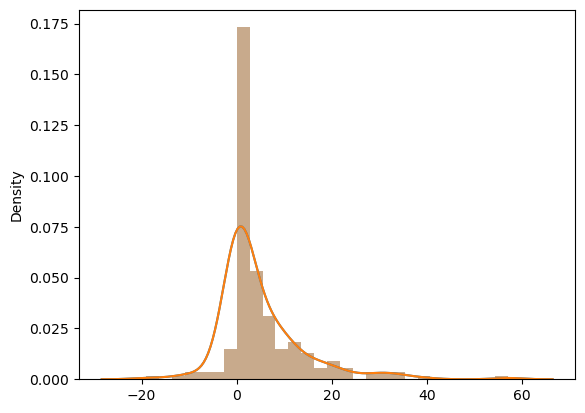

In [87]:

h_x=final_data['Yards.Gained'].head(200)
h_ox=train['Yards.Gained'].head(200)
sns.distplot(x=h_x)
sns.distplot(x=h_ox)

/tmp/ipykernel_3689/999410761.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=h_x)
/tmp/ipykernel_3689/999410761.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=h_ox)


<Axes: ylabel='Density'>

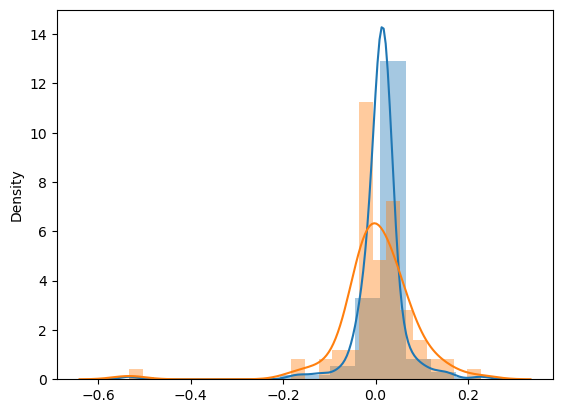

In [93]:
h_x=final_data['airWPA'].head(200)
h_ox=train['airWPA'].head(200)
sns.distplot(x=h_x)
sns.distplot(x=h_ox)

#                                           THANKYOU @ UTKARSS